# Vector Database
Once the Text is loaded and divide into split such that it doesn't exceed the token limit, the embeddings are created for the model which is needed to be stored.
<br>
For that it is required to have a vecotor databases for the model. There are Several Vectoer databases for that purpose example **Pinecone**,**Milvus**, **Chroma**, etc.
<br>
<br>
For this project I used **FAISS Index**. FAISS Stands for **Facebook AI Similarity Search**. It is the library by facebook that allows to perform efficient and faster search of stored vectors from the vectors user provide, that can be used as light-weight in memory vector database.

In [1]:
#To use FAISS we need to install following libraries:
!pip install faiss-cpu
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 844.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In order to understand how vector data baseworks we need to import sample data for our database.

In [57]:
#importing library
import pandas as pd
pd.set_option('display.max_colwidth', 100)
# loading sample data
df = pd.read_csv("/content/drive/MyDrive/text/sample_text.csv")
df.shape

(15, 2)

In [58]:
df

,text,category
0,The art exhibition opens this Saturday at 10 AM.,Event
1,Leather jackets are making a strong comeback this winter.,Fashion
2,The tech conference will be held online this year.,Event
3,Esports tournaments now offer million-dollar prize pools.,Gaming
4,The new RPG title features an open world and rich storyline.,Gaming
5,Getting enough sleep supports your immune system.,Health
6,Accessorizing with vintage items adds unique charm.,Fashion
7,Staying hydrated is essential for overall wellness.,Health
8,Multiplayer strategy games are trending in 2025.,Gaming
9,Speedrunners have already broken records in the latest platformer.,Gaming


In order to work on a vecotr databse we need to convert the following data to the vectors. In order to convert the data to vectors we need a library called **Sentence Transformers**.

In [59]:
from sentence_transformers import SentenceTransformer

The model for encoder I used for the SentenceTransformers in the project is [all-mpnet-base-v2](https://huggingface.co/sentence-transformers/all-mpnet-base-v2)

In [60]:
encoder = SentenceTransformer("all-mpnet-base-v2")

In [61]:
#The encoder has encode function which accepts the array of text as an argument.
# Lets pass the text field of dataframe as an array. Let it be vectors.
vectors = encoder.encode(df.text)

In [62]:
vectors.shape

(15, 768)

15 indacte the number of vectors created whereas 768 indicates the size of each vector.

In [63]:
#if we print the vector we get an array of the encoded digits for each text
vectors

array([[-0.031238  , -0.00340298, -0.03521133, ..., -0.00062837,
        -0.06356464, -0.00830095],
       [-0.01784179, -0.00522584,  0.00667526, ...,  0.00877011,
         0.00456624,  0.00923553],
       [-0.00560502, -0.02825156, -0.02088344, ..., -0.04023777,
        -0.00392453,  0.0016674 ],
       ...,
       [-0.02017291, -0.01116422, -0.02385538, ..., -0.03249193,
        -0.01551753, -0.02065012],
       [-0.0192035 , -0.04370684, -0.03728465, ...,  0.01868175,
        -0.02152353,  0.01206955],
       [ 0.02667073,  0.04645275, -0.02869271, ...,  0.05983773,
         0.0042171 ,  0.02421021]], dtype=float32)

In [64]:
#For example:
print(f"Text:    ``{df.text[0]}``\nVector:  ``{vectors[0][:5]}``")

Text:    ``The art exhibition opens this Saturday at 10 AM.``
Vector:  ``[-0.031238   -0.00340298 -0.03521133  0.04704174 -0.04561872]``


Lets store these encoded vectors in vectorDB

In [65]:
dim = vectors.shape[1]
import faiss

We are using faiss's indexL2 which uses eucledian distance for indexing i.e.
<br>
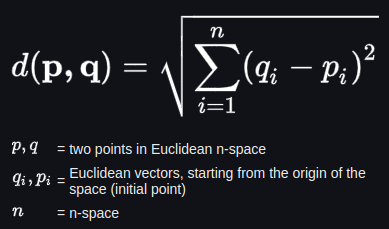
<br>
This basically creates the indexes of **n** dimension. n is the **dim** which is the size of each vectors.

In [66]:
index = faiss.IndexFlatL2(dim)
index

<faiss.swigfaiss_avx2.IndexFlatL2; proxy of <Swig Object of type 'faiss::IndexFlatL2 *' at 0x7ba74444b780> >

These indexes can be used to store the vectors we created, that's why vectorDB is often reffered as vector indexing. The benefit of this vector indexing as it allows the **faster similarity search** which is very useful for the **retrieval of similar data** from the **prompt/argument** we will provide.

Lets add these vectors in indexes we created..

In [67]:
index.add(vectors)

Once the vectors are store the indexs are ready for the search.
For that purpose we can use **search()** function it accepts the vector as an argument i.e. **searchVector**.

It is created in a similar way as we prepared the vectors but searchVector includes the Query we pass in it lets just say its **searchQuery**.

In [68]:
searchQuery = "I love games"
vec = encoder.encode(searchQuery)
vec.shape

(768,)

We encoded the query and get a single dimensional array of size 768. But for searching in index it requires to have at lest 2 dimensional array therefore we need to reshape this vector and to do that we need numpy.

In [69]:
import numpy as np
searchVector = np.array(vec).reshape(1,-1)
searchVector.shape

(1, 768)

Now we can use it to perform search in index. For searching **search()** function requires an another argument **k**. This value is use to indicate how many values we need to retrieve.


In [70]:
index.search(searchVector, k=3)

(array([[1.3546879, 1.3944244, 1.4706907]], dtype=float32),
 array([[ 8, 10,  4]]))

This returned an array of 3 values i.e.

1. Distance between the similar vectors.
2. Data type.
3. Array including index of original array where the similar values were stored.

If we check the index 8,10,4.

In [71]:
array = [8,10,4]
for i in array:
    print(df.text[i])

Multiplayer strategy games are trending in 2025.
Gamers are excited about the next-gen console release.
The new RPG title features an open world and rich storyline.


The resulting values are similar to the prompt we provided earlier i.e. gaming. Lets try with different prompt..

In [72]:
searchQuery = "To fulfill body's nutrional need one is required to have a balanced diet"
vec = encoder.encode(searchQuery)
searchVector = np.array(vec).reshape(1,-1)
index.search(searchVector, k=3)

(array([[1.3146284, 1.5221058, 1.7267466]], dtype=float32),
 array([[ 7,  5, 12]]))

In [73]:
array = [7,5,12]
for i in array:
    print(df.text[i])

Staying hydrated is essential for overall wellness.
Getting enough sleep supports your immune system.
Walking 30 minutes a day can improve heart health.


Similar to previos prompt we get similar values for current prompt as well i.e. health.

We can store the resulting values from the search index output in 2 different variables. i.e.

In [74]:
dis, loc = index.search(searchVector, k=3)
loc

array([[ 7,  5, 12]])

using this value we can show values from datafame as-well

In [77]:
df.loc[loc[0]]

,text,category
7,Staying hydrated is essential for overall wellness.,Health
5,Getting enough sleep supports your immune system.,Health
12,Walking 30 minutes a day can improve heart health.,Health


We noticed that the resulting values are quite similar but not exact as the given prompt. This is possible because of the semantic search.

i.e. Instead looking for the exact keywords what we get is value of similar context.

For example: we know that apple is a fruit, but it is also a famouse brand for electronics. We know that these are distinct because these are for different category. i.e. fruit or company.

If we store data for these categories, and perform a search based on prompt lets say.


> An Apple a day keeps doctor away.

The resulting values will be fetched from the category of fruits only not from brand and vice-versa. The semantic search is what allows platform like google to distinct between these categories and provide relevant search results based on the query we provide..
